# Carregar as bibliotecas

In [1]:
import numpy as np
from skimage import io, data, filters, util, color, transform, exposure
from scipy import ndimage, stats, fft
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_uint, img_as_ubyte

# Questão 1
<p align="justify">
Calcular a transformada de Fourier das seguientes imagens. Logo, compare sua semelhança usado a similaridade de cossenos.
<p>

<p>A similaridade de cossenos é definida da seguinte forma:
$$\frac{\sum{A*B}}{\sqrt{\sum{A^2}} \sqrt{\sum{B^2}}}$$
onde $A$ e $B$ são vetores.




<ol>
  <li>Implemente a função que calcule a similaridade de cossenos.</li>
  <li>Rotacione a imagem <i>A </i> em 30 e 60 graus. Logo, calcular a transformada de Fourier da letra A e das duas versões rotacionadas.  Depois, determine a semelhança entre elas usando a função que calcula a similaridade de cossenos.</li>
  <li>Compare a semelhança dos coeficientes de Fourier das letras <i>A, B</i>, e <i>V</i></li>
  <li>Compare a semelhança dos coeficientes de Fourier das letras <i>B</i>, e a versão de <i>B</i> trasladada</li>
  <li><i>Transforme as imagens de coordenadas cartesianas para coordenadas polares. Depois calcule a transformada de Fourier e determine a semelhança entre elas.</li>
</ol>
</p>



<table><tr>
<td> <img src="https://drive.google.com/uc?id=1h4QeEvRgB7wbAY9MocKGaaKDdniiQWQ6" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1WV7pcoGXW6cJh74OjBwiD41gGcXfRMft" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1soqJU7p5e59FBYBi1f5g34_4en8Q1e0k" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1V5hZKGaQ-wlCjVnYgOG6WnnPih5nF7ET" alt="Drawing"  width="300"/> </td>
</tr></table>


### 2.1 Cálculo da similaridade de cossenos



In [5]:
def cossine_sim(vecA, vecB):
  produto = np.sum(vecA * vecB) # Produto escalar

  magnitudeA = np.sqrt(np.sum(vecA ** 2))
  magnitudeB = np.sqrt(np.sum(vecB ** 2))

  return produto / (magnitudeA * magnitudeB)

In [4]:
print( cossine_sim(np.array([[2,4],[1,6]]), np.array([[3,5],[20,6]])) )

0.5009881985289902


### 2.2 Rotacionar *A* em 30 e 60 graus. Depois calcule a Transformade Fourier das 3 imágenes. Finalmente, compare a letra A com as duas versões rotacionadas.

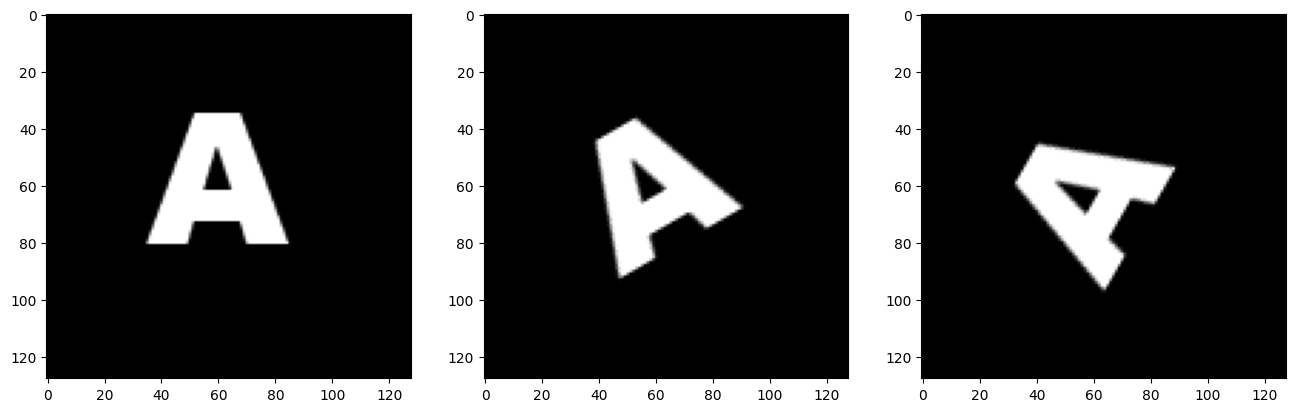

In [6]:
A = io.imread('https://drive.google.com/uc?id=1h4QeEvRgB7wbAY9MocKGaaKDdniiQWQ6', as_gray = True)
A_30 = transform.rotate(A, 30)
A_60 = transform.rotate(A, 60)
f,ax = plt.subplots(1,3,figsize=(16,16))
ax[0].imshow(A, cmap='gray')
ax[1].imshow(A_30, cmap='gray')
ax[2].imshow(A_60, cmap='gray')


In [7]:
fA = fft.fft2(fft.fftshift(A)) # trasformada de Fourier da letra A
fA_30 = fft.fft2(fft.fftshift(A_30)) # trasformada de Fourier da letra A rotacionada em 30 graus
fA_60 = fft.fft2(fft.fftshift(A_60)) # trasformada de Fourier da letra A rotacionada em 60 graus

print(f'Distancia entre A e A30: {cossine_sim(np.abs(fA), np.abs(fA_30))}')
print(f'Distancia entre A e A60: {cossine_sim(np.abs(fA), np.abs(fA_60))}')

Distancia entre A e A30: 0.9020690498750079
Distancia entre A e A60: 0.9253000938925873


###  2.3 Calcule a Transformade Fourier das letras *A, B* e *V*. Depois, compare os coeficientes de Fourier da letra A com a letra B, e com a letra V.

In [8]:
B = io.imread('https://drive.google.com/uc?id=1WV7pcoGXW6cJh74OjBwiD41gGcXfRMft', as_gray = True)
V = io.imread('https://drive.google.com/uc?id=1V5hZKGaQ-wlCjVnYgOG6WnnPih5nF7ET', as_gray = True)
Bt = io.imread('https://drive.google.com/uc?id=1soqJU7p5e59FBYBi1f5g34_4en8Q1e0k', as_gray = True)

In [9]:
fB = fft.fft2(fft.fftshift(B)) # trasformada de Fourier da letra B
fV = fft.fft2(fft.fftshift(V)) # trasformada de Fourier da letra V

In [10]:
print(f'Distancia entre A e B: {cossine_sim(np.abs(fA), np.abs(fB))}')
print(f'Distancia entre A e V: {cossine_sim(np.abs(fA), np.abs(fV))}')

Distancia entre A e B: 0.9128478779289086
Distancia entre A e V: 0.9707504375773455


### 2.4 Calcule a transformada de Fourier das letras *B* e *Bt* traslada e compare seus coeficientes.

In [11]:
fB = fft.fft2(fft.fftshift(B)) # trasformada de Fourier da letra B
fBt = fft.fft2(fft.fftshift(Bt)) # trasformada de Fourier da letra B trasladada

In [12]:
print(f'Distancia entre B e Bt: {cossine_sim(np.abs(fB), np.abs(fBt))}')

Distancia entre B e Bt: 1.0


### 2.5 Transforme as 3 letras A de coordenadas cartesianas para coordenadas polares. Use a função <i>skimage.transform.warp_polar(image, center=None, radius=None, output_shape=None, scaling='linear', multichannel=False, channel_axis=None, **kwargs)</i>. Logo, calcule a transformada de Fourier da imagens transformadas e compare elas. Verifique se a distancian entre elas aumentou ou disminuiu

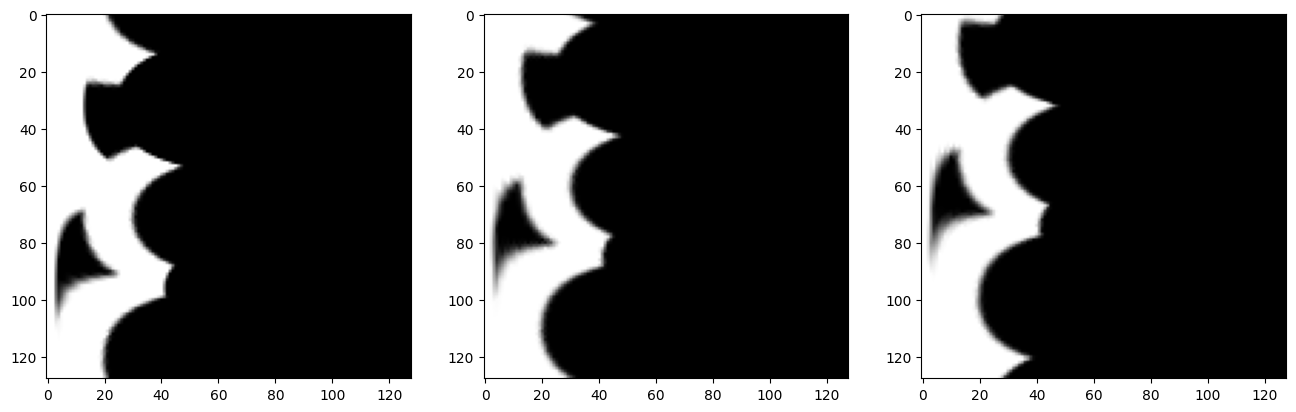

In [13]:
Ap = transform.warp_polar(A, output_shape=A.shape) # coordenadas polares de imagem A
A_30p = transform.warp_polar(A_30, output_shape=A_30.shape) # coordenadas polares de imagem A rotacionada em 30 graus
A_60p = transform.warp_polar(A_60, output_shape=A_60.shape) # coordenadas polares de imagem A rotacionada em 60 graus

f,ax = plt.subplots(1,3,figsize=(16,16))
ax[0].imshow(Ap, cmap='gray')
ax[1].imshow(A_30p, cmap='gray')
ax[2].imshow(A_60p, cmap='gray')


In [ ]:
fAp = # codigo para calcular a trasformada de Fourier da letra A em coordenadas polares
fA_30p = # codigo para calcular a trasformada de Fourier da letra A rotacionada em 30 graus em coordenadas polares
fA_60p = # codigo para calcular a trasformada de Fourier da letra A rotacionada em 60 graus em coordenadas polares

print(f'Distancia entre A e A30: {cossine_sim(np.abs(fAp), np.abs(fA_30p))}')
print(f'Distancia entre A e A60: {cossine_sim(np.abs(fAp), np.abs(fA_60p))}')

Distancia entre A e A30: 0.999402316901732
Distancia entre A e A60: 0.9994091460474418


## Questao 3
<p> A ideia principal do $\textit{unsharp masking}$ é que o desfoque da imagem remova os detalhes de uma imagem, mas se adicionarmos esses detalhes de volta à imagem dimensionada por um determinado fator, os detalhes seriam aprimorados e obteríamos uma imagem ``mais nítida''. O  $\textit{unsharp masking}$ é, portanto, definido como abaixo:
$$f + \alpha(f - f*g)$$
onde $f*g$ é a imagem suavizada, $f$ é a imagem original e $\alpha$ é um fator de escala. Implementar a função $\textit{unsharp masking}$
</p>

In [14]:
def gridFourier(M, N):
    u = np.arange(0, M)
    v = np.arange(0, N)

    u = u - np.floor(M/2)
    v = v - np.floor(N/2)
    U, V = np.meshgrid(u, v)
    return U, V

In [19]:
def passa_freq(img, mask):
    height, width = img.shape[:2]
    fimg = fft.fftshift(fft.fft2(img))
    fimg = fimg * mask
    nimg = fft.ifft2(fimg)
    nimg = np.abs(nimg)
    return nimg

In [16]:
def mask_gaussiana(width, height, sigma):
    U, V = gridFourier(width, height)
    D = np.sqrt((U ** 2) + (V ** 2))
    H = np.exp((-D ** 2) / (2 * sigma ** 2))
    return H

In [17]:
def highboost(img, radio = 30, k = 1):
  height, width = img.shape[:2]
  mask = mask_gaussiana(width, height, radio)
  img = img_as_float(img)
  f = img + k * (img - passa_freq(img, mask))
  f = np.clip(f, 0, 1)
  return f

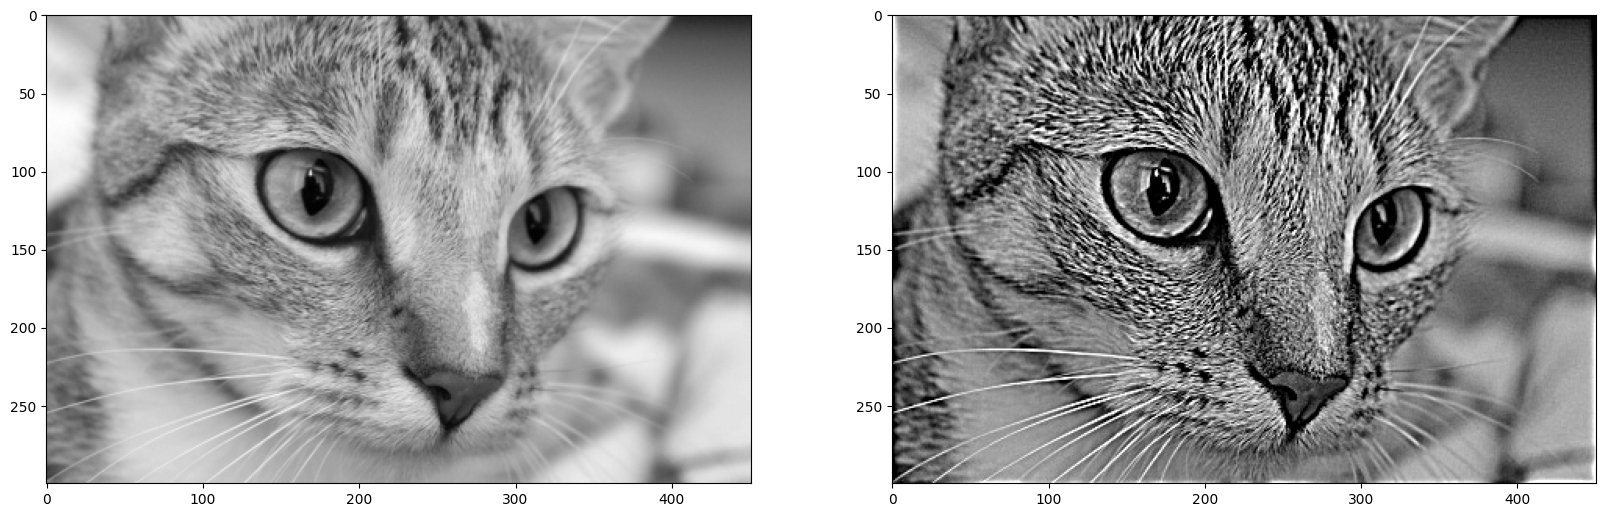

In [20]:
img = data.chelsea()
img = color.rgb2gray(img)
nimg = highboost(img, radio = 30, k = 5)

f, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(nimg, cmap='gray')